# Internsavy

# Task 2:Use Clustering Techniques for the any customer dataset using machine learning


# Author: Aiswarya S

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#loding dataset
df=pd.read_csv("C:/Users/Aiswarya/Downloads/archive (24)/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#to get the number of rows and columns 
df.shape

(200, 5)

In [4]:
#checking null values and missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# to get information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# to display the statistical information about the dataset 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df = df.rename(columns={'Annual Income (k$)': 'AnnualIncome'})
df = df.rename(columns={'Spending Score (1-100)': 'SpendingScore'})
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


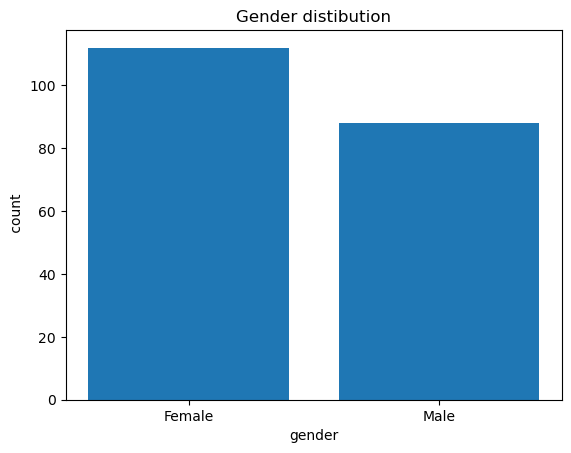

In [9]:
# counting gender 

gender_count=df['Gender'].value_counts()
gender_count

# bar plot
plt.bar(gender_count.index,gender_count.values)
plt.xlabel('gender')
plt.ylabel(' count')
plt.title('Gender distibution')
plt.show()

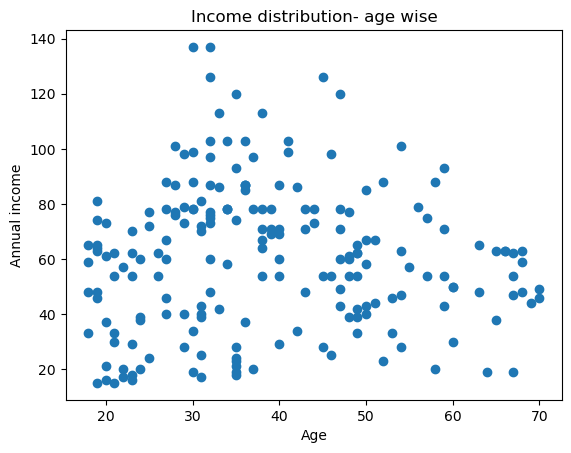

In [14]:
#scatter plot
plt.scatter(df['Age'],df['AnnualIncome'])
plt.xlabel('Age')
plt.ylabel('Annual income')
plt.title('Income distribution- age wise')
plt.show()

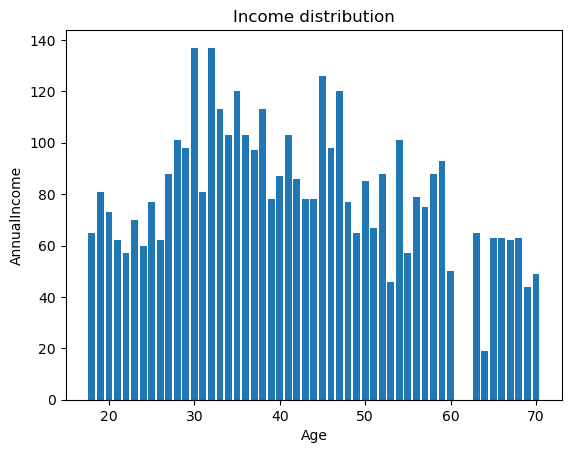

In [19]:
plt.bar(df['Age'],df['AnnualIncome'])
plt.xlabel('Age')
plt.ylabel('AnnualIncome')
plt.title('Income distribution')
plt.show()

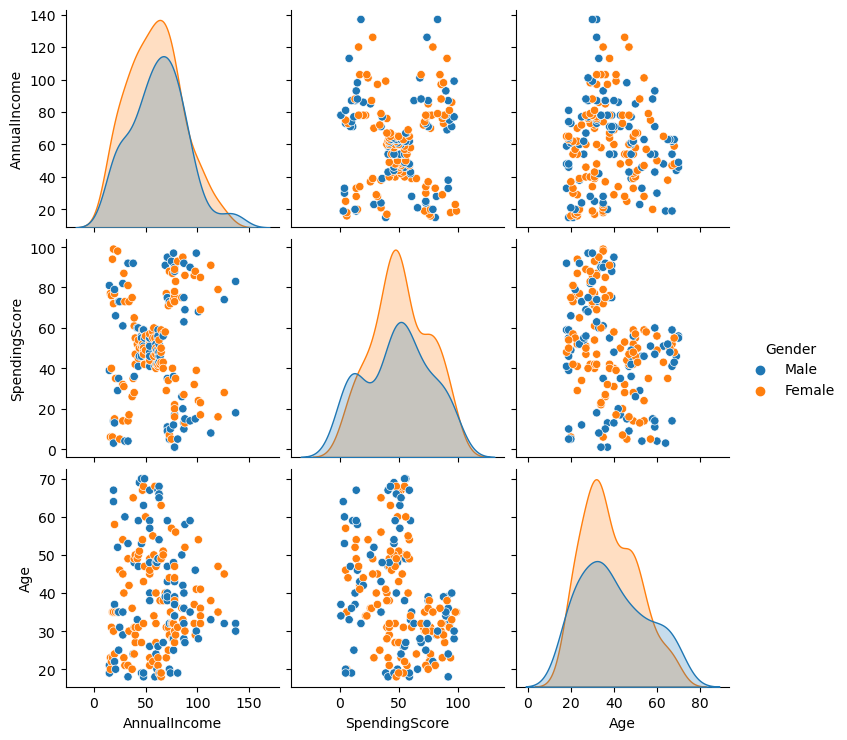

In [24]:
selected_columns=['AnnualIncome','SpendingScore','Age','Gender']
sns.pairplot(df[selected_columns],hue='Gender')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

col=['AnnualIncome','SpendingScore']
X=df[col]

#choose the number of clusters
k=3

kmeans=KMeans(n_clusters=k)
kmeans

kmeans.fit(X)

#obtain the cluster label
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster'] = labels



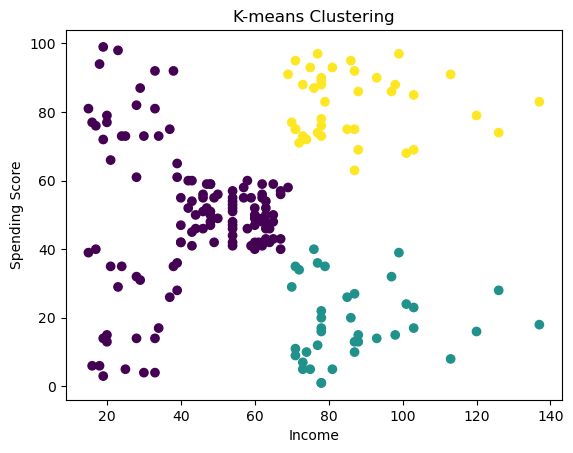

In [37]:
#visualize the model 
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score

# Assuming your DataFrame is called 'df' and the cluster labels are in the 'cluster' column
X = df[['AnnualIncome', 'SpendingScore']]
labels = df['cluster']

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)

print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.46761358158775435
